# Question 3

1. Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.
2. Show the histograms of the original and corrected images.

## Explanation

* The CIELAB (L x a x b) color space is a color model designed *to approximate human vision and perception*. 
* Unlike RGB and CMYK color spaces that are based on the capabilities of physical devices (such as monitors and printers), CIELAB aims to represent perceptual color differences more accurately. 
* It consists of three components: 

1. L* for lightness - represents the lightness of the color. It ranges from 0 (black) to 100 (white). Unlike RGB and other color spaces, L* tries to mimic the human perception of brightness more closely.

2. a* for green-red color - represents the color on the green-red axis. *Negative values indicate green, while positive values indicate red.* Zero represents a neutral color.

3. b* for blue-yellow color - represents the color on the blue-yellow axis. *Negative values indicate blue, while positive values indicate yellow.* Zero represents a neutral color.

* CIELAB color space was designed to be perceptually uniform, meaning that the Euclidean distance between two colors in the CIELAB space should closely match the perceived difference between those colors by the human eye. This makes it useful for color-related tasks, such as color correction, color matching, and image analysis.

* To convert an image from the RGB color space to the CIELAB color space in OpenCV, the cv2.cvtColor() function is used.

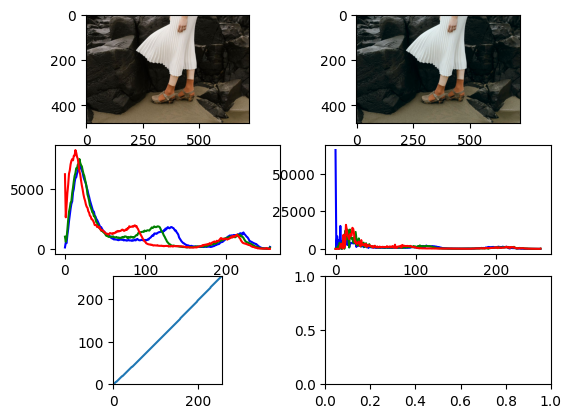

In [1]:
%matplotlib inline

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread ( 'W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/highlights_and_shadows.jpg' , cv.IMREAD_COLOR)

# Convert to CIELAB color space
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)

# Define the gamma value
gamma = 1.04
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

# Apply gamma correction to all planes (L*, a*, and b*)
for i in range(3):

    plane = img_lab[:, :, i]

    corrected_plane = np.power(plane / 255.0, gamma) * 255.0

    img_lab[:, :, i] = corrected_plane.astype(np.uint8)

# Convert back to BGR color space
image_gamma_corrected_bgr = cv.cvtColor(img_lab, cv.COLOR_Lab2BGR)

#Convert to RGB color space.
img_orig = cv.cvtColor( img_orig , cv.COLOR_BGR2RGB)
img_gamma_corrected = cv.cvtColor( image_gamma_corrected_bgr , cv.COLOR_BGR2RGB)

f , axarr = plt.subplots ( 3 , 2 )

axarr [ 0 , 0 ] . imshow( img_orig )
axarr [ 0 , 1 ] . imshow( img_gamma_corrected)

color = ( 'b','g','r' )

for i , c in enumerate ( color ) :

    hist_orig = cv.calcHist( [ img_orig ] , [ i ] , None , [ 256 ] , [ 0 , 256] )
    axarr [ 1 , 0 ] . plot ( hist_orig , color = c )

    hist_gamma = cv.calcHist( [ img_gamma_corrected ] , [ i ] , None , [ 256 ] , [ 0 , 256 ] )
    axarr [ 1 , 1 ] . plot( hist_gamma , color = c )

axarr [ 2 , 0 ] . plot( table )
axarr [ 2 , 0 ] . set_xlim(0 ,255)
axarr [ 2 , 0 ] . set_ylim(0 ,255)
axarr [ 2 , 0 ] . set_aspect( 'equal' )

#Displaying using OpenCV

img_orig_bgr = cv.cvtColor( img_orig , cv.COLOR_RGB2BGR)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',img_orig_bgr)
cv.waitKey(0)

cv.imshow('Enhanced', image_gamma_corrected_bgr)
cv.waitKey(0)
cv.destroyAllWindows()


## Reference Codes

In [10]:
import cv2 as cv

# Load an image in BGR format
image_bgr = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Images/emma.jpg', cv.IMREAD_COLOR)

# Convert to CIELAB color space
image_lab = cv.cvtColor(image_bgr, cv.COLOR_BGR2Lab)

# Now you can access the L*, a*, and b* components
l_channel = image_lab[:, :, 0]
a_channel = image_lab[:, :, 1]
b_channel = image_lab[:, :, 2]

# Display the original and CIELAB images
cv.imshow('Original', image_bgr)
cv.imshow('CIELAB', image_lab)
cv.waitKey(0)
cv.destroyAllWindows()


In [12]:
import cv2 as cv
import numpy as np

# Load an image in BGR format
image_bgr = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Images/emma.jpg', cv.IMREAD_COLOR)

# Convert to CIELAB color space
image_lab = cv.cvtColor(image_bgr, cv.COLOR_BGR2Lab)

# Define the gamma value (e.g., 0.5 for darker, 1.5 for brighter)
gamma = 1.1

# Apply gamma correction to all planes (L*, a*, and b*)
for i in range(3):
    plane = image_lab[:, :, i]
    corrected_plane = np.power(plane / 255.0, gamma) * 255.0
    image_lab[:, :, i] = corrected_plane.astype(np.uint8)

# Convert back to BGR color space
image_gamma_corrected_bgr = cv.cvtColor(image_lab, cv.COLOR_Lab2BGR)

# Display the original and gamma-corrected images
cv.imshow('Original', image_bgr)
cv.imshow('Gamma Corrected', image_gamma_corrected_bgr)
cv.waitKey(0)
cv.destroyAllWindows()
